In [13]:
import stylia
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import collections

In [22]:
from stylia import TWO_COLUMNS_WIDTH, ONE_COLUMN_WIDTH


df = pd.read_csv("../data/finalScreen.tsv", sep="\t")
df = df[df["nUniq"] >= 2]
db = df[df["l2fc"] >= 2.3]
db = db[db["l2fcM"] >= 1]
db = db[db["ml10p"] > -np.log10(0.05)]
db = db[db["ml10adjP"] > -np.log10(2.5)]
db = db[db["rankRel"] < 500]

with open("../data/pid2name_primary.tsv", "r") as f:
    pid2name = {}
    name2pid = {}
    reader = csv.reader(f, delimiter="\t")
    for r in reader:
        pid2name[r[0]] = r[1]
        name2pid[r[1]] = r[0]

prot_counts = collections.defaultdict(int)
for r in list(db["accession"]):
    prot_counts[r] += 1

cmap_types = stylia.colors.ContinuousColorMap(
    stylia.colors.NamedColorMaps().spectral, transformation=None
)
cmap_types.fit([0,1,2,3,4])

def counts_categorizer(pid):
    v = prot_counts[pid]
    if v < 4:
        return 0
    if v < 10:
        return 1
    if v < 20:
        return 2
    if v < 40:
        return 3
    return 4

fragment_counts = collections.defaultdict(int)
for r in db["fragId"].tolist():
    fragment_counts[r] += 1

fragment_counts = sorted(fragment_counts.items(), key=lambda x: -x[1])

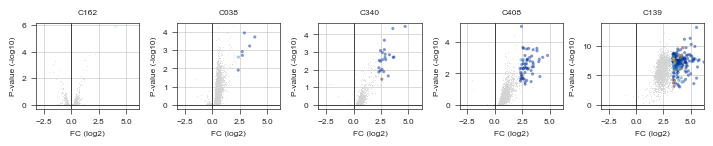

In [40]:
def volcano_plot(ax, fid):
    import matplotlib as mpl
    db_ = db[db["fragId"] == fid]
    df_ = df[df["fragId"] == fid]
    prots = set(db_["accession"])
    df_ = df_[~df_["accession"].isin(prots)]
    x = np.array(df_["l2fc"])
    y = np.array(df_["ml10p"])
    ax.scatter(x,y, s=0.5, color="lightgray", alpha=0.5, lw=0)
    ax.axvline(0, color="black", lw=0.5)
    ax.axhline(0, color="black", lw=0.5)
    x = np.array(db_["l2fc"])
    y = np.array(db_["ml10p"])
    pids = list(db_["accession"])
    c = np.array([counts_categorizer(p) for p in pids])
    idxs = np.argsort(c)[::-1]
    x = x[idxs]
    y = y[idxs]
    c = c[idxs]
    c = cmap_types.transform(c)
    ax.scatter(x,y, s=5, c=c, alpha=0.5, lw=0)    
    ax.set_xlabel("FC (Log2)")
    ax.set_xlabel("")
    ax.set_ylabel("P-value (-Log10)")
    ax.set_title("Fragment {0}".format(fid))
    ax.set_title("")
    #xticks = [0, 2, 4, 6]
    #ax.set_xticks(xticks)
    #ax.set_xticklabels(xticks,va="top", ha="center")
    #yticks = [0, 2, 4, 6]
    #ax.set_yticks(yticks)
    #ax.set_yticklabels(yticks, va="center", ha="left")
    #ax.text(5, 0.5, "{0} hits".format(db_.shape[0]), color="black", va="center", ha="center", fontsize=6)
    ax.set_xlim(-3.2, 6.2)
    stylia.label(ax=ax, title=fid, xlabel="FC (log2)", ylabel="P-value (-log10)")

fig, axs = stylia.create_figure(1, 5, width=TWO_COLUMNS_WIDTH, height=TWO_COLUMNS_WIDTH/5)

for idx in [370, 300, 250, 200, 100]:
    ax = axs.next()
    volcano_plot(ax, fragment_counts[idx][0])

plt.tight_layout()
stylia.save_figure("/Users/mduranfrigola/Desktop/promiscuity_grading.png")

In [41]:
db

,accession,geneName,protHits,fragId,ligHits,mdfClass,l2fc,l2fcM,ml10adjP,ml10p,expId,nUniq,nPep,perCovg,rankRel
0,Q8IXH7,NELFCD,91,C001,61,3,4.80,3.73,1.459680,4.529764,BD20_057,8,8,16,1
1,Q15165,PON2,91,C001,136,3,4.77,3.70,1.459680,4.316495,BD20_057,2,2,7,2
2,Q16740,CLPP,91,C001,87,3,4.37,3.30,1.491192,4.881066,BD20_057,8,8,31,3
3,P21796,VDAC1,91,C001,190,3,4.02,2.95,1.146249,3.565970,BD20_057,27,29,92,4
4,P49721,PSMB2,91,C001,161,3,4.02,2.95,1.459680,4.305486,BD20_057,7,7,42,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339229,Q96HY6,DDRGK1,154,C433,27,2,2.50,1.03,1.476835,2.797757,BD22_113,6,6,28,157
1339230,P46100,ATRX,154,C433,1,2,2.49,1.02,1.358043,2.363916,BD22_113,2,3,1,159
1339231,Q02818,NUCB1,154,C433,133,2,2.49,1.02,1.315966,2.082202,BD22_113,14,16,36,159
1339232,Q9Y584,TIMM22,154,C433,64,2,2.49,1.02,1.363061,2.386512,BD22_113,2,2,10,159


In [46]:
genes = db[db["fragId"] == "C186"]["geneName"].tolist()

In [52]:
hp = pd.read_csv("../data/human_proteome_with_gene_names.tab", sep="\t")

In [57]:
import random

x = random.sample(hp["Gene names  (primary )"].tolist(), 50)
x = [y for y in x if y != "nan" and ";" not in y]


In [59]:
genes = set(genes).union(x)

In [63]:
import csv
with open("/Users/mduranfrigola/Desktop/irb_biomed_seminar_example.csv", "w") as f:
    writer = csv.writer(f)
    for x in genes:
        writer.writerow([x])

In [74]:
ds = pd.read_csv("../data/fid2can_fff_all.tsv", sep="\t")
ds = ds[ds["fid"].isin(db["fragId"])]

smiles = random.sample(ds["smiles"].tolist(), 50)
with open("/Users/mduranfrigola/Desktop/irb_seminar_example/my_list_of_fragments.tsv", "w") as f:
    writer = csv.writer(f)
    for x in smiles:
        writer.writerow([x])

In [77]:
ds = pd.read_csv("../../fragment-predictor/data/all_fff_enamine.csv")

In [82]:
smiles =random.sample(ds["smiles"].tolist(), 50)
with open("/Users/mduranfrigola/Desktop/irb_seminar_example/my_list_of_fragments.tsv", "w") as f:
    writer = csv.writer(f)
    for x in smiles:
        writer.writerow([x])